In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [10]:
# Função para calcular e plotar a DCT de um sinal
def plot_dct(t, signal, title="DCT Visualization"):
    N = len(signal)
    
    # Calculando a DCT tipo II
    dct_coefficients = dct(signal, type=2, norm='ortho')
    
    # Reconstrução usando a DCT inversa
    reconstructed_signal = idct(dct_coefficients, type=2, norm='ortho')
    
    # Plotando os resultados
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Sinal original
    axes[0].plot(t, signal, label="Original Signal", color="blue")
    axes[0].set_title("Original Signal")
    axes[0].legend()
    
    # Coeficientes da DCT
    axes[1].stem(dct_coefficients, 
                #  use_line_collection=True, 
                 basefmt=" ", 
                 markerfmt="ro")
    axes[1].set_title("DCT Coefficients")
    axes[1].set_xlabel("Frequency Index")
    
    # Sinal reconstruído
    # axes[2].plot(t, reconstructed_signal, label="Reconstructed Signal", color="green")
    # axes[2].set_title("Reconstructed Signal")
    # axes[2].legend()
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

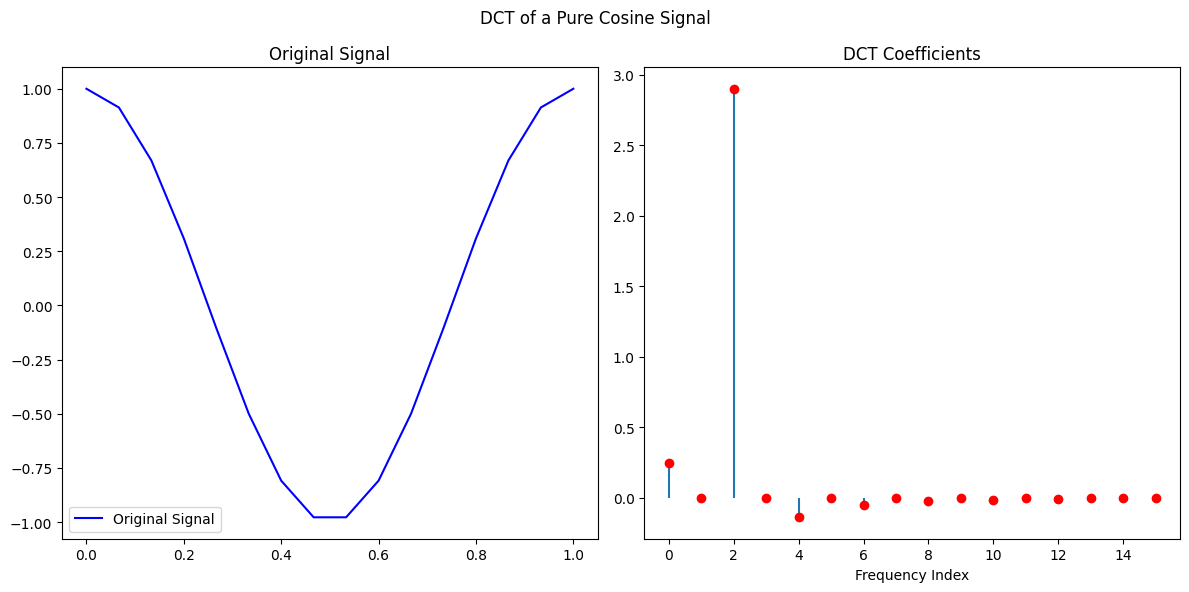

In [16]:
# Sinal simples: função cosseno puro
N = 16
t = np.linspace(0, 1, N)
cosine_signal = 1 * np.cos(2 * t * np.pi) # Frequência específica

plot_dct(t, cosine_signal, title="DCT of a Pure Cosine Signal")

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [24]:
@interact(freq=(1, 10, 1), b=(-5, 5, 1))
def plot_cosine_dct(freq, b):
    N = 16
    t = np.linspace(0, np.pi, N, endpoint=False)
    cosine_signal = 1 * np.cos(freq * t) + b # Frequência específica

    plot_dct(t, cosine_signal, title="DCT of a Pure Cosine Signal")

interactive(children=(IntSlider(value=5, description='freq', max=10, min=1), IntSlider(value=0, description='b…

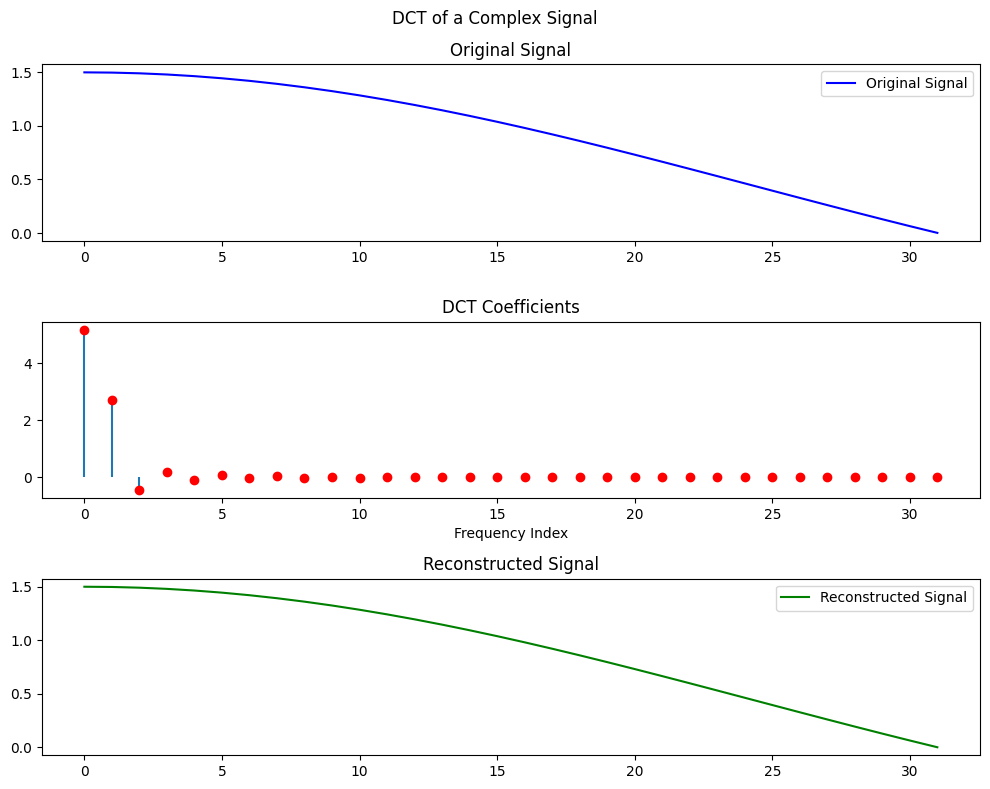

In [6]:
# Sinal mais complexo: soma de cossenos
complex_signal = np.cos(2 * np.pi * t / N) + 0.5 * np.cos(4 * np.pi * t / N)
plot_dct(complex_signal, title="DCT of a Complex Signal")

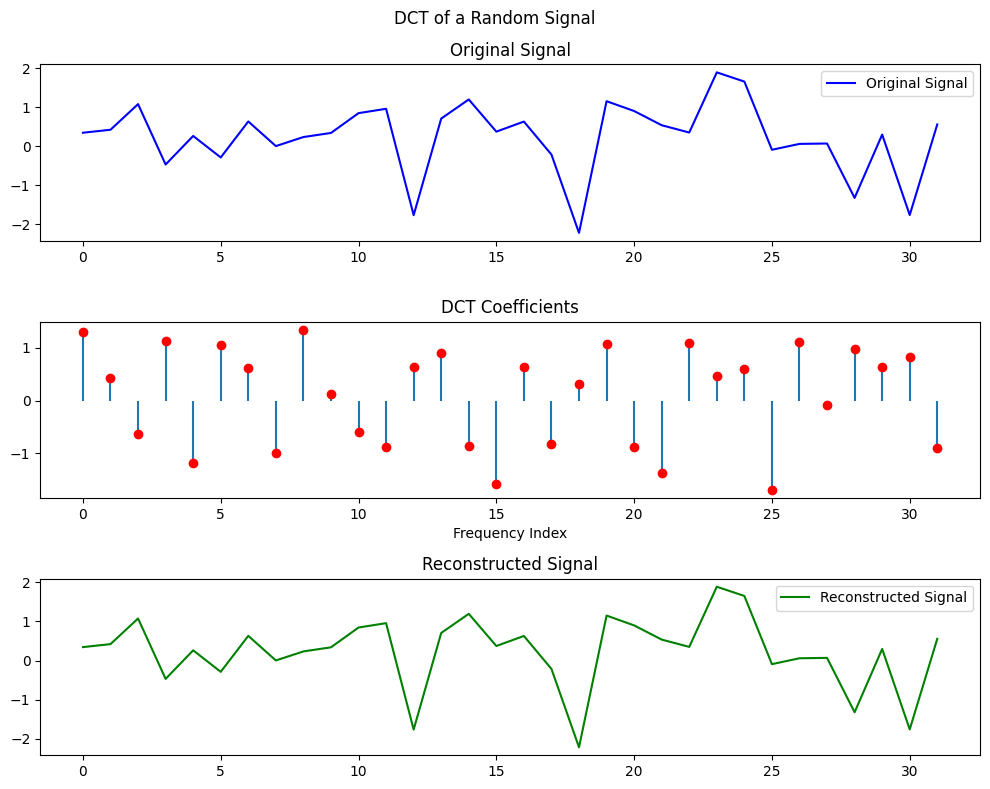

In [7]:
# Sinal randômico para visualizar energia distribuída
random_signal = np.random.randn(N)
plot_dct(random_signal, title="DCT of a Random Signal")